### Dive into DL - 李沐 - 2021

https://www.bilibili.com/video/BV1Fb4y1D7Jt

#### 数据操作 - 对tensor的各种操作

##### 基本操作

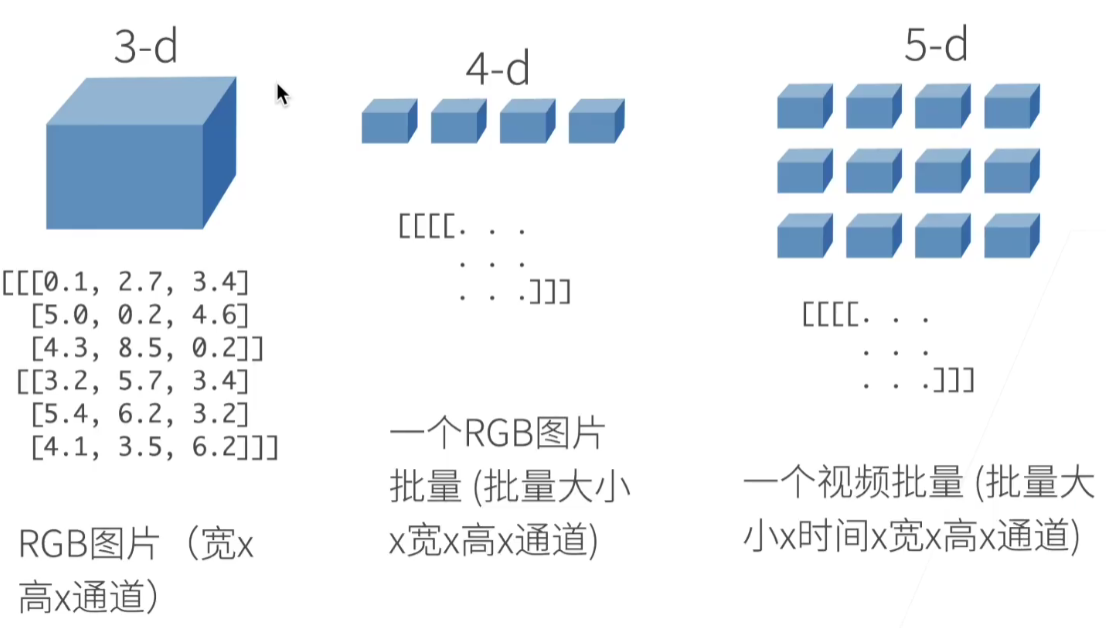

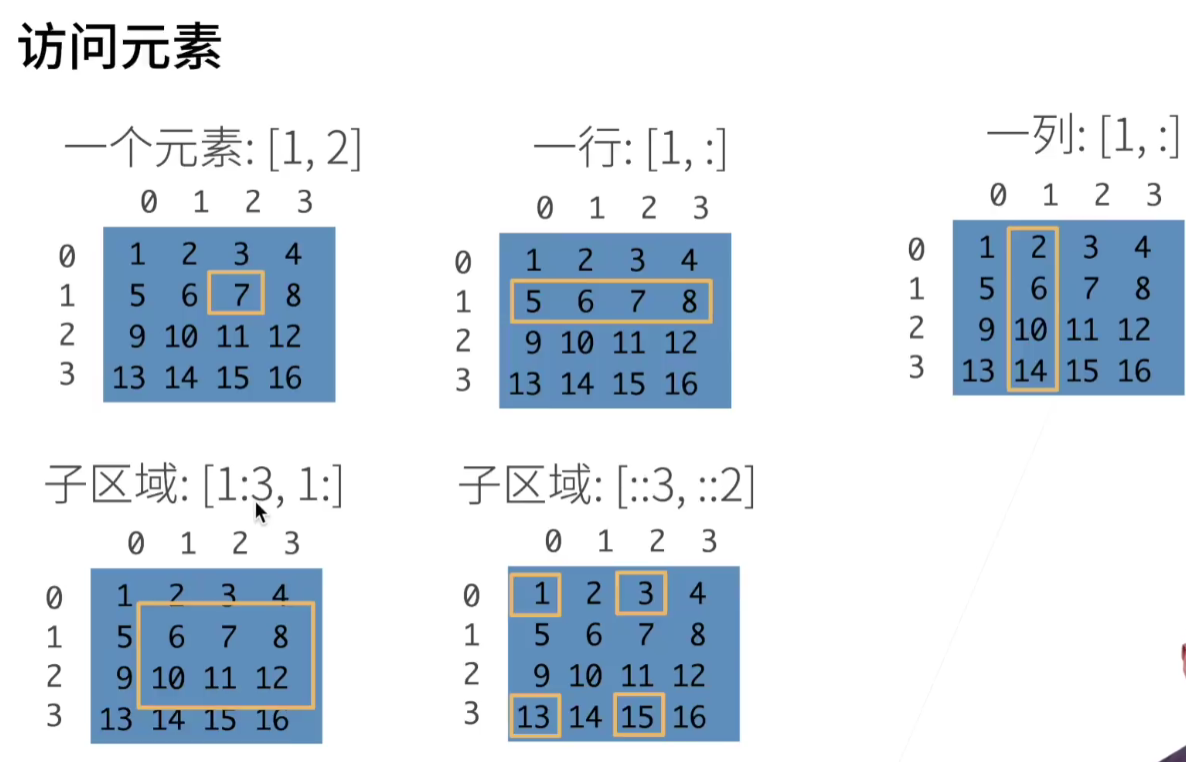

In [4]:
import torch

In [2]:
x = torch.arange(12) # 初始化
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
x.shape

torch.Size([12])

In [4]:
x.numel() # num of element

12

In [5]:
# 更改形状
x = x.reshape(3,4) # 3 * 4 = 12 对不上不行
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [6]:
# 全0张量
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
# 全一张量
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
# 通过python list来赋值 ,二维数组直接转成tensor
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [10]:
%%timeit -n20 -r10
#常见的四则运算可以升级为按元素运算
x = torch.tensor([1.0,2,4,8]) # 第一个用. 则全都是浮点运算
y = torch.tensor([2,2,2,2])
x+y, x-y, x*y , x/y , x**y # **求幂

49.6 µs ± 9.84 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


In [10]:
# 按元素的方式应用更多计算
torch.exp(x) # 指数

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [11]:
# 多个张量连接在一起
X = torch.arange(12,dtype=torch.float32).reshape(3,4)
Y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)
# cat即为concate，第一个是第0维合并，就在行合并，就是堆起来
# 第二个是第1维合并，就是按列合并，就是左右拼起来

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
# 通过逻辑运算符构建二维张量
X == Y # 按元素值进行判断真假返回一个布尔矩阵

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
# 对张量中所有元素进行求和会产生一个只有一个元素的张量
X.sum()

tensor(66.)

In [14]:
# 从numpy过来的广播机制-broadcasting mechanism
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b # 互相扩充到对方的x,y

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [15]:
a+b # 维度还是要一样，比如这里都是数组，维度不一样没戏

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [16]:
# 切片的元素访问
X[-1], X[1:3] # 最后一行 和 1-2行拿出来

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [17]:
# 指定索引写入值
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [18]:
# 为多个元素赋值，切片索引
X[0:2,:] = 12 # 0-1行 和 所有列
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [19]:
# 运行一些操作可能会给新结果分配内存
before = id(Y)
Y = Y + X
id(Y) == before

False

In [20]:
# 执行原地操作
Z = torch.zeros_like(Y)
print('id(Z)',id(Z))
Z[:] = X+Y
print('id(Z)',id(Z))

id(Z) 2340878183952
id(Z) 2340878183952


In [21]:
# 如果后续计算中没有重复使用X，也可以使用X[:] = X + Y 或者 X += Y
# 来减少操作的内存开销
before = id(X)
X += Y
id(X) == before

True

In [22]:
# 转换为numpy张量
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [23]:
# 将大小为1的张量转换为python标量
a = torch.tensor([3.5])
a , a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

##### 答疑

In [34]:
# reshape 和view的区别 - 没有本质区别
a = torch.arange(12)
b = a.reshape((3,4)) # b并没有复制a，b只是创建了一个a的view
b[:] = 2 # 改变了b的元素，a也跟着变了，所以b就是a，只是复制了不同的视图副本，类似软链接
a

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

tensor和numpy很像，但是不一样，pytorch从torch来的，是lua的一个框架，MXNET和numpy比较像，tensor是一个数学上的概念，是一个张量，而numpy的ndarray是计算机概念，数组

In [26]:
# 与Numpy非常类似
a = torch.tensor([1,2,3])
print(a)
print(type(a),'\n')

a = torch.linspace(-1,1,10)
print(a,'\n')

a = torch.randn((1,2))
print(a)

tensor([1, 2, 3])
<class 'torch.Tensor'> 

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000]) 

tensor([[-0.0062,  1.0299]])


In [ ]:
# 但是Tensor运算可以放在GPU上执行，利用GPU的并行计算加速
a = torch.tensor([1,2]).cuda()  # 无GPU环境无法执行
b = torch.tensor([3,4]).cuda()
print(a+b)

In [ ]:
# pytorch提供梯度的自动计算
# 梯度即为导数在高维度上的推广
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)
c = 3 * a **2 -b # 数学计算表达式
c.backward() # 反向传播
print(a.grad)
print(b.grad)
print(c)

#### ⭐数据预处理 - 如何把一个csv文件读进来，变成tensor矩阵！

创建一个人工数据集，存储在csv(逗号分隔值)文件里

In [35]:
import os
os.makedirs(os.path.join('..','made_data'),exist_ok=True)
data_file = os.path.join('..','made_data','house_tiny.csv') # csv意思是每一行是一个数据，每一个entry(域)是用逗号隔开
with open(data_file,'w')as f:
    f.write('NumRooms,Alley,Price\n') # column name
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

从创建的csv文件中加载原始数据集，一般读取csv文件都是用pandas,pandas和numpy对于数据科学家来说至关重要

In [37]:
# 如果没有pandas只需取消下一行的注释
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data) # 在jupyter里不print直接最后一行输出的话用html来显示 更漂亮
data

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [38]:
# 为了处理缺失的数据，典型的方法包括插值和删除，这里考虑使用插值
inputs, outputs = data.iloc[:,0:2], data.iloc[:,2] # 此时data是一个4*3的表，iloc即为index location切片来放input和output
inputs = inputs.fillna(inputs.mean()) # 对于所有的NaN(No a Number)的域的值，使用平均值进行插值
inputs # 由于Alley不是数值，而是字符串，所以没有修改，只对数值域的进行修改

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [39]:
# 对于inputs中的类别值或离散值，我们将"NaN"视为一个类别
inputs = pd.get_dummies(inputs,dummy_na=True) # 有点像one-hot
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [41]:
# 现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式
import torch
x,y = torch.tensor(inputs.values),torch.tensor(outputs.values) # 深度学习的dtype一般用float32，float64太慢了
x,y # 我们现在就把一个csv文件转成一个纯的张量了！！！

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

#### 线性代数的torch实现

In [42]:
# 标量由只有一个元素的张量表示
import torch 
x = torch.tensor([3.0])
y = torch.tensor([2.0])

x+y, x*y, x/y, x**y

(tensor([5.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

In [43]:
# 可以将向量视为标量值组成的列表
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [46]:
# 通过张量的索引来访问任一元素
print(x[3])
# 访问张量的长度
print(len(x))
# 只有一个轴的张量，形状只有一个元素
print(x.shape)

tensor(3)
4
torch.Size([4])


In [47]:
# 通过指定两个分量m和n来创建一个形状为m*n的矩阵
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [48]:
# 矩阵的转置 - 轴对称翻转
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [50]:
# 对称矩阵(symmetric matrix) - A = A^T
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
print(B)
B == B.T

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [51]:
# 向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构 
X = torch.arange(24).reshape(2,3,4) # 矩阵维度为2(两个矩阵)，3*4的
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [53]:
# 给定具有相同形状的任何两个张量，任何按元素儿远运算的结果都是相同形状的张量
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone() # 在tensor里面如果B=A，只会把其内存地址返回，所以要用clone把A复制一份传给B
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [54]:
# 两个矩阵的按元素乘法称为哈达玛积(Hardmard product)-数学符号⊙
A*B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [55]:
# 张量和标量的运算就是直接广播：矩阵所有元素都做一次运算
a = 2
X = torch.arange(24).reshape(2,3,4)
a + X,(a * X). # 所有元素都 +a 和所有元素都乘a

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [56]:
# 计算tensor元素的和
x = torch.arange(4,dtype=torch.float32)
x,x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [73]:
# 表示任意形状张量的元素和
A = torch.arange(20*2,dtype=torch.float32).reshape(2,5,4)
A,A.shape,A.sum()

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.],
          [16., 17., 18., 19.]],
 
         [[20., 21., 22., 23.],
          [24., 25., 26., 27.],
          [28., 29., 30., 31.],
          [32., 33., 34., 35.],
          [36., 37., 38., 39.]]]),
 torch.Size([2, 5, 4]),
 tensor(780.))

In [74]:
# 指定求和汇总张量的轴
A_sum_axis0 = A.sum(axis=0) # 这时候把维度为2的那个轴进行了求和
print(A_sum_axis0,A_sum_axis0.shape)
A_sum_axis0 = A.sum(axis=1) # 这时候把维度为5的那个轴进行了求和
print(A_sum_axis0,A_sum_axis0.shape)
A_sum_axis0 = A.sum(axis=2) # 这时候把维度为4的那个轴进行了求和
A_sum_axis0,A_sum_axis0.shape

tensor([[20., 22., 24., 26.],
        [28., 30., 32., 34.],
        [36., 38., 40., 42.],
        [44., 46., 48., 50.],
        [52., 54., 56., 58.]]) torch.Size([5, 4])
tensor([[ 40.,  45.,  50.,  55.],
        [140., 145., 150., 155.]]) torch.Size([2, 4])


(tensor([[  6.,  22.,  38.,  54.,  70.],
         [ 86., 102., 118., 134., 150.]]),
 torch.Size([2, 5]))

In [75]:
# 按照两个维度求和
A_sum_axis01 = A.sum(axis=[0,1])
A_sum_axis01,A_sum_axis01.shape

(tensor([180., 190., 200., 210.]), torch.Size([4]))

In [76]:
# 一个求和相关的量是平均值(mean或者average)
A.mean(), A.sum()/A.numel()

(tensor(19.5000), tensor(19.5000))

In [77]:
# 按照某个维度进行求平均操作
A.mean(axis=0), A.sum(axis=0)/A.shape[0]

(tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]),
 tensor([[10., 11., 12., 13.],
         [14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.],
         [26., 27., 28., 29.]]))

In [78]:
# 计算综合或均值时保持轴数不变 - 按某个维度求和而不想把维度丢掉
sum_A = A.sum(axis =1, keepdim=True)# keepdim后可以做广播
sum_A

tensor([[[ 40.,  45.,  50.,  55.]],

        [[140., 145., 150., 155.]]])

In [79]:
# 在上面的keepdim操作之后，就可以通过广播机制让A除以sum_A
A / sum_A # 不做keepdim的话就不可以做广播

tensor([[[0.0000, 0.0222, 0.0400, 0.0545],
         [0.1000, 0.1111, 0.1200, 0.1273],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.3000, 0.2889, 0.2800, 0.2727],
         [0.4000, 0.3778, 0.3600, 0.3455]],

        [[0.1429, 0.1448, 0.1467, 0.1484],
         [0.1714, 0.1724, 0.1733, 0.1742],
         [0.2000, 0.2000, 0.2000, 0.2000],
         [0.2286, 0.2276, 0.2267, 0.2258],
         [0.2571, 0.2552, 0.2533, 0.2516]]])

In [81]:
# 某个轴计算A元素的累加求和
A.cumsum(axis=1) # 就按照那个维度一个一个加下去加到最后一行

tensor([[[  0.,   1.,   2.,   3.],
         [  4.,   6.,   8.,  10.],
         [ 12.,  15.,  18.,  21.],
         [ 24.,  28.,  32.,  36.],
         [ 40.,  45.,  50.,  55.]],

        [[ 20.,  21.,  22.,  23.],
         [ 44.,  46.,  48.,  50.],
         [ 72.,  75.,  78.,  81.],
         [104., 108., 112., 116.],
         [140., 145., 150., 155.]]])

In [82]:
# 点积是相同位置的按元素乘积的和
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [83]:
# 点积也可以通过执行按元素乘法，然后进行求和来表示
torch.sum(x*y)

tensor(6.)

In [87]:
# 矩阵向量积Ax是一个长度为m的列向量，其i^th元素是点积a_i^Tx
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
A.shape, x.shape, torch.mv(A,x) # mv即为matrix vectormotification

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [89]:
# 我们可以将矩阵乘法AB看作是简单执行m次矩阵-向量积，并将结果拼接在一起，形成一个n*m矩阵
B = torch.ones(4,3) # 5*4与 4*3变成 5*3
torch.mm(A,B) # mm:matrix multiplecation

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

L2范数： 是向量元素平方和的平方根
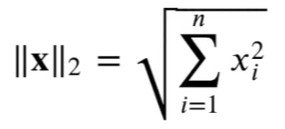

In [90]:
# L2范数： 是向量元素平方和的平方根
u = torch.tensor([3.0, -4.0])
torch.nor

tensor(5.)

L1范数，表示向量元素的绝对值之和
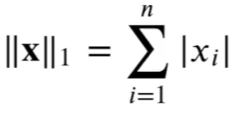

In [91]:
# L1范数，表示向量元素的绝对值之和
torch.abs(u).sum() # 没有内置函数，用两个操作一起即可

tensor(7.)

F范数:弗罗贝乌斯范数(Frobenius norm)是矩阵元素的平方和的平方根
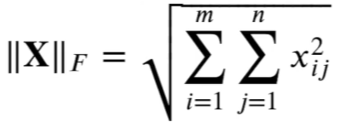

等价于把矩阵拉成一个向量，然后做向量的范数

In [92]:
# 弗罗贝乌斯范数(Frobenius norm)
torch.norm(torch.ones(4,9))

tensor(6.)

#### 自动求导的torch实现

假设我们想对函数y = 2x^Tx 关于列向量x 求导

In [93]:
import torch
x = torch.arange(4.0)
x # 长为4的一个向量

tensor([0., 1., 2., 3.])

In [94]:
# 再我们计算y关于x的梯度之前，我们需要一个地方来存储梯度
x.requires_grad_(True) # require_grad=true后梯度就会存在x.grad里面
x.grad # y关于x的导数是放在这个地方的，默认值是none
# 也可以在创建时候就写好x = torch.arange(4.0,require_grad=true)

In [95]:
# 现在我们计算y
y = 2*torch.dot(x,x) # y = 2x^Tx
y # 隐式的构造了计算图，故有梯度函数告诉你y是从x计算过来的

tensor(28., grad_fn=<MulBackward0>)

In [96]:
# 通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward() # 求导
x.grad # 通过x.grad访问我的导数

tensor([ 0.,  4.,  8., 12.])

In [97]:
x.grad == 4*x # 通过计算 2x^Tx即 2x^2的导数应该为 4x

tensor([True, True, True, True])

默认情况下，pytocrh会累积梯度，我们需要清除之前的值

In [101]:
# 清除累积的梯度之后，计算x的另一个函数
x.grad.zero_() # 不清楚则x.grad会把上次留下的梯度累加起来
y = x.sum() # 求向量的sum梯度是全1
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [102]:
# 深度学习中，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和
# 对非标量的调用backward需要传入一个gradient参数，该参数指定微分函数
x.grad.zero_()
y = x * x # 万一y不是标量的情况，但是DL中很少对向量求导
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # 是向量的话，就变成标量再求导
x.grad

tensor([0., 2., 4., 6.])

之前讲的大量向量和矩阵，矩阵和矩阵之间的求导在DL里面使用很少

In [103]:
# 将某些计算移动到记录的计算图之外
x.grad.zero_()
y = x * x
u = y.detach() # 把y当作一个常数，而不是一个函数，此时u是一个常数
z = u * x  # z关于x的导数变成一个常数
# 在要将网络参数固定住的时候是很有用的
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [104]:
# 与上一格对比
x.grad.zero_()
y.sum().backward() # 还是可以通过y来求导，u和y没有关联
x.grad == 2 * x

tensor([True, True, True, True])

In [105]:
# 构建计算图需要通过python控制流(例如，条件、循环或任意函数调用)，我们仍然可以计算得到的变量的梯度
def f(a):
    b = a * 2
    while b.norm() < 1000: # 根据b的值来决定数据流向
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
# torch把计算图存下来，计算图倒着回去一遍就得到矩阵
a = torch.randn(size=(),requires_grad=True) # a为随机数，size=()为一个标量
d = f(a)
d.backward()

a.grad == d/a

tensor(True)

答疑

    1.显示构造-静态图(符合数学公式的推导方式)，显示构造是先写计算再给值，隐式则不用
    2.传播来说，正向和反向都要算一遍
    3.默认累积梯度:批量操作，一次性算不出所有梯度，所以分开
    4.loss一般是标量，所以不用向量求导
    5.多个loss也需要累加梯度
    6.不做backward是不会去计算梯度的，因为计算梯度很贵的，占用很多内存
    7.求导过程一般是有向图，树状，RNN可以变成环状，但是计算上还是会展开的

在实际中我们很少使用梯度下降，一般用的其实是小批量(batch)随机梯度下降，在整个训练集上算梯度，就是对loss求导，也就是每个样本计算一次差值求和，开销非常大，可能需要很久，所以随机采用b个样本计算近似损失。所以批量大小(batch_size)不能太大也不能太小，太小了利用不到并行最大资源，太大了内存消耗增加，比如样本都相同则计算无用

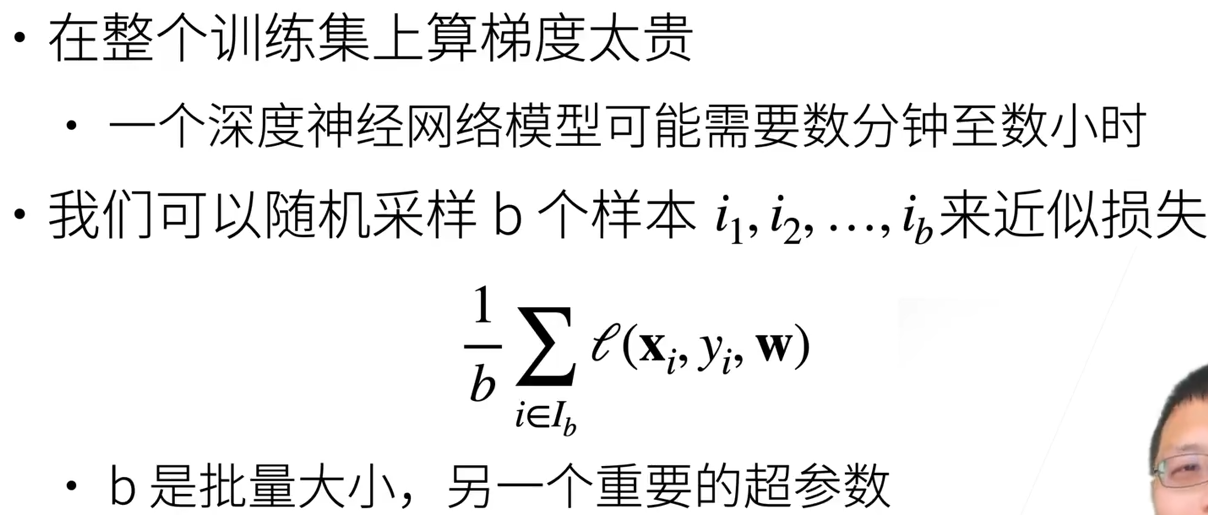

    梯度下降通过不断沿着反梯度方向更新参数求解-不用显示解，只需要不停求梯度
    小批量随机梯度下降是深度学习默认的求解算法
    两个重要的超参是batch_size和learning rate

#### 线性回归的手动从零实现

线性回归模型y = w_1*x_1+w_2*x_2+w_3x_3+b可以看作是单层神经网络

这里将从0开始实现整个方法，包括数据流水线，模型，损失函数和小批量随机梯度下降优化器

In [4]:
%matplotlib inline
# 这一行可以默认plot的时候嵌入到notebook里面
import random
import torch
# from d2l import torch as d2l

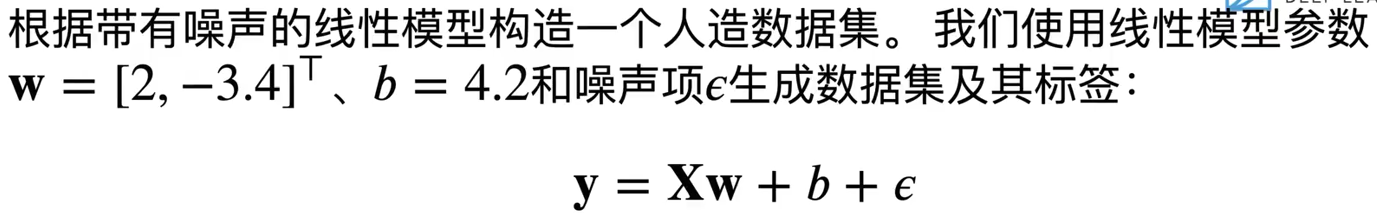

In [9]:
# 构造一个数据集 : 根据带有噪声的线性模型构造一个人造数据集，使用线性模型参数
# w = [2,-3.4]^T,b=4.2和噪声项c生成数据集和标签 y = Xw +b + c
def synthetic_data(w, b, num_examples):
    '''生成y = Xw +b + 噪声'''
    # normal即为正态分布的赋值
    X = torch.normal(0, 1, (num_examples, len(w)))# 均值为0 方差为1 的随机数，numExamples为行len为列
    y = torch.matmul(X, w) + b # y就是X*w+b
    y += torch.normal(0, 0.01, y.shape) # 加入噪音
    return X, y.reshape((-1,1)) # 做成列向量返回

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features, labels[:10]

(tensor([[-0.8740, -1.1416],
         [-0.9142, -0.3468],
         [ 0.1245,  0.3444],
         ...,
         [-0.4504, -0.1100],
         [ 1.0872,  1.1270],
         [-1.3926, -0.6718]]),
 tensor([[ 6.3369],
         [ 3.5610],
         [ 3.2730],
         [ 6.1725],
         [ 0.3165],
         [ 6.1899],
         [-3.4335],
         [ 4.7525],
         [-1.9309],
         [ 3.1718]]))

In [11]:
# 每次读取一个小batch，定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入
# 生成大小为batch_size的小批量
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 每个样本的index
    # 这些样本随机读取，没有特定顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):# 每次跳batch_size个大小
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])# batch的index找出来
        yield features[batch_indices], labels[batch_indices] # yield看作迭代器，每次产生一随机样本，拿到即输出
# 每次随机选取batch_size个样本返回出来
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[ 0.3974, -0.4687],
        [ 1.9770, -1.8527],
        [ 0.5266, -0.4490],
        [-0.6964, -0.6932],
        [-1.6712, -0.6786],
        [-2.2117, -0.8597],
        [ 0.3772,  1.3105],
        [-0.4758,  0.5729],
        [-0.1070, -2.3634],
        [-0.1561, -1.6253]]) 
 tensor([[ 6.5922],
        [14.4378],
        [ 6.7897],
        [ 5.1629],
        [ 3.1586],
        [ 2.6971],
        [ 0.4901],
        [ 1.2819],
        [12.0215],
        [ 9.4071]])


In [28]:
# 定义 初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)#均值为0，方差为1，size为(2,1)的矩阵
b = torch.zeros(1, requires_grad=True) # 一个标量
#需要更新的参数，requires_grad=True就完事了
# 每次要重新训练的话，要把参数随机初始化一次，这样就不会跟着上一次的梯度结果来了

In [14]:
# 定义模型
def linearRegress(X, w, b):
    '''线性回归模型'''
    return torch.matmul(X, w) + b # 矩阵乘向量+偏差就是我们的预测

In [15]:
# 定义损失函数
def squared_loss(y_hat, y):
    '''均方误差损失'''
    return (y_hat - y.reshape(y_hat.shape))**2 / 2 # 一个是向量一个可能是行向量列向量

# 定义优化算法
def SGD(params, lr, batch_size):# params是一个List,里面包含了w和b
    '''小批量随机梯度下降，朝梯度的反方向更新'''
    with torch.no_grad(): # 更新的时候不要参与梯度计算
        for param in params: # 对每一个参数更新，这里是w和b
            param -= lr * param.grad / batch_size # 往梯度反方向更新参数，除以size是求均值，在loss除也可以，一样
            param.grad.zero_() # 最后就可以把梯度清零了，下一次又求新的梯度

In [29]:
from tqdm import tqdm
# 训练过程  可以在这里练习调参的魅力
lr = 0.03 # 太小则loss降很慢，太大则loss会成nan，因为可能除0或者无限的值出现
num_epochs = 10 # 就是把整个数据扫10遍的意思
net = linearRegress # network
loss = squared_loss
# 训练基本都是两层for loop
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels): # 每次拿出一个批量大小的X, y
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为 l 形状是(batch_size, 1)，而不是一个标量。1中的所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward() # 求和之后算梯度，有梯度之后就可以更新了
        SGD([w, b], lr, batch_size) # 使用参数的梯度更新参数，其他数据batch_size有可能不被整除，要修改
    with torch.no_grad():# 这里是评价指标
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean())}')

epoch 1, loss 0.051443733274936676
epoch 2, loss 0.0002282365458086133
epoch 3, loss 5.016811337554827e-05
epoch 4, loss 4.927720146952197e-05
epoch 5, loss 4.9577447498450056e-05
epoch 6, loss 4.943214662489481e-05
epoch 7, loss 4.928051930619404e-05
epoch 8, loss 4.935502147418447e-05
epoch 9, loss 4.945681939716451e-05
epoch 10, loss 4.947412890032865e-05


In [30]:
# 比较真实参数和通过训练学到的参数来评估训练的成功程度
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

w的估计误差:tensor([-0.0003, -0.0007], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0002], grad_fn=<RsubBackward1>)


#### 线性回归的torch.nn实现

通过使用深度学习框架来简洁实现线性回归模型

In [45]:
# 生成数据集
import numpy as np
import torch
from torch.utils import data

def synthetic_data(w, b, num_examples):
    '''生成y = Xw +b + 噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)))# 均值为0 方差为1 的随机数，numExamples为行len为列
    y = torch.matmul(X, w) + b # y就是X*w+b
    y += torch.normal(0, 0.01, y.shape) # 加入噪音
    return X, y.reshape((-1,1)) # 做成列向量返回

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features, labels[:10]

(tensor([[ 0.5691,  1.1203],
         [-0.9829,  0.0879],
         [ 0.8831, -1.4437],
         ...,
         [ 1.9828, -0.4721],
         [-1.6839, -2.3684],
         [ 0.7029,  0.7653]]),
 tensor([[ 1.5182],
         [ 1.9457],
         [10.8763],
         [-3.7943],
         [-0.6130],
         [ 6.5721],
         [ 2.0443],
         [ 3.0516],
         [12.3657],
         [ 7.0079]]))

In [46]:
# 调用框架中现有的API来读取数据
def load_array(data_arrays, batch_size, is_train=True):
    '''构造一个pytorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)# *对于list和tuple是解包，dict是**解包
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels),batch_size)# 把features和labels做成一个list,传到tensor的dataset里面

next(iter(data_iter))# 构造的iterator用next函数得到一个x一个y

[tensor([[-1.0543, -1.1275],
         [ 0.9352, -1.1310],
         [ 0.4352,  0.2811],
         [-0.6706,  0.1959],
         [-1.4181, -0.6662],
         [ 0.7421,  1.6190],
         [ 0.1627,  1.0953],
         [-0.0735,  1.2021],
         [ 0.0425,  0.4379],
         [-0.1231, -1.1885]]),
 tensor([[ 5.9223],
         [ 9.9067],
         [ 4.1195],
         [ 2.1846],
         [ 3.6386],
         [ 0.1986],
         [ 0.8095],
         [-0.0475],
         [ 2.7976],
         [ 7.9932]])]

In [41]:
# 使用框架的预定义好的层, nn 是nerual network
from torch import nn # 里面有大量定义好的层
net = nn.Sequential(nn.Linear(2, 1)) # 线性的层就是全连接层，只需要指定输入维度是2输出维度是1
# Sequential就是一个容器，就是list of layers，把层按顺序放在一起

In [50]:
# 初始化模型参数
net[0].weight.data.normal_(0, 0.01) # network可以通过下标访问layer，然后将权重的data使用正态分布替换，均值为0，方差0.01
net[0].bias.data.fill_(0) #通过对象的方式访问权重和偏差，fill即为填充

tensor([0.])

In [43]:
# 计算均方误差使用MSELoss类，也称为平方L2范数
loss = nn.MSELoss()
# 实例化SGD实例
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)#起码传入所有params包括w和b还有学习率

In [51]:
# 训练过程都大同小异差不多
num_epochs = 6 # 三个周期
for epoch in range(num_epochs): #  每个epoch扫一次所有数据
    for X, y in data_iter: # 在iter里面一次一次把我们的mini_batch拿出来
        l = loss(net(X), y) # 这里的net自己带了模型参数,pytorch自动做sum
        trainer.zero_grad() # 先清零再backward，pytorch不帮你梯度清零
        l.backward()
        trainer.step()
    l = loss(net(features), labels)# 扫完一遍后，对所有feature求一次loss来看看效果
    print(f'epoch{epoch + 1}, loss {l:f}')

epoch1, loss 0.000265
epoch2, loss 0.000105
epoch3, loss 0.000106
epoch4, loss 0.000106
epoch5, loss 0.000106
epoch6, loss 0.000106


答疑

    1.Adam对学习率不敏感
    2.batch_size其实越小越好，同样计算下收敛越好，size小的话，噪音多，反而对NN学习有益，不会过拟合
    3.这样的data_iter方法每次把所有load进去，数据量大了容易爆内存，但一般数据不会特别大，可以pre-fetch
    4.yield生成器就是要一个batch就run一遍就好，不用把所有batch都生成好，效率高
    5.其实可以写一个收敛判断如果3个epoch的loss变化不大就停下来

#### 损失函数

L2 LOSS - 预测值与真实值隔得远时梯度大参数更新的多，隔得近梯度小参数更新的小
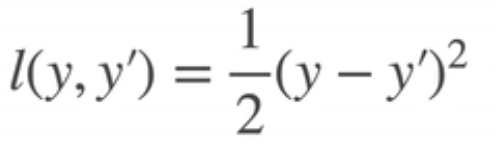
L1 LOSS - 绝对值损失函数:隔得多远，不一样的时候都更新一样的梯度(常数)，稳定，但零点不可导，末期不稳定
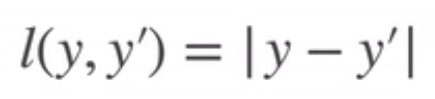
Huber's Robust Loss - 取以上两个的优点，差得远就是L1模式，近了就L2模式
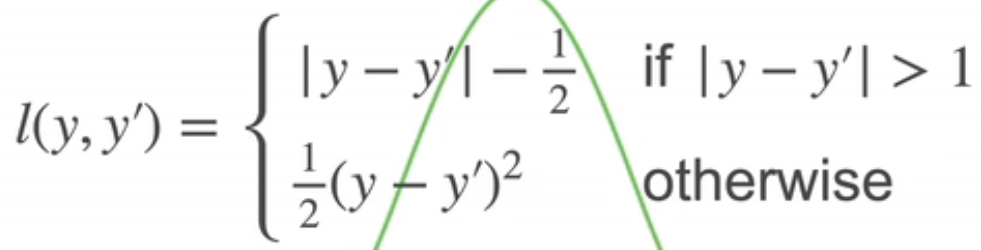

#### Mnist数据集
Fashion-MNIST版本

In [52]:
%matplotlib inline
import torch
import torchvision # 视觉库
from torch.utils import data
from torchvision import transforms # 对数据进行操作

In [57]:
# 通过框架内置函数将Fashion-MNIST下载读入
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值归一化
trans = transforms.ToTensor() # 用自带库transforms.totensor将图片转换为tensor
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True, # 上一级目录的data文件夹
                                               transform=trans,download=True)# train=true代表下载的是训练数据集
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,
                                              transform=trans,download=True)# transform参数指定了后直接拿到tensor
len(mnist_train),len(mnist_test)

Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw


Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw
Processing...
Done!


D:\Anaconda\envs\Deep\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(60000, 10000)

In [58]:
mnist_train[0][0].shape # 黑白图片故只有一个rgb通道，长和宽为28

torch.Size([1, 28, 28])

In [61]:
# 可视化数据集的函数
import matplotlib.pyplot as plt
def get_fashion_mnist_labels(labels):
    '''返回fashion-MNIST数据集的文本标签'''
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    '''Plot a list of images'''
    figsize = (num_cols*scale, num_rows*scale)
    _, axes = plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i,(ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)

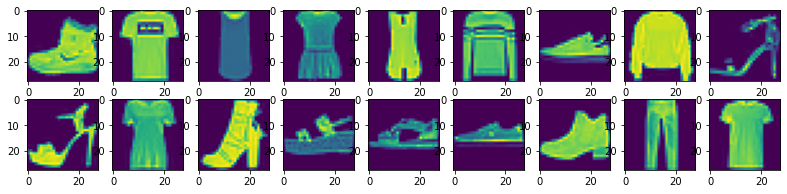

In [65]:
# 几个样本的图像及其相应的标签
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))# Dataloader就是一个iterator
show_images(X.reshape(18, 28, 28), 2, 9, titles = get_fashion_mnist_labels(y))

In [76]:
# 读取一个小批量的数据，大小为batch_size
batch_size = 256
def get_dataloader_workers():
    '''找到自己cpu有多少个核，并且使用与核数相等的进程数来读取数据'''
    import psutil
    cpu_nums = int(psutil.cpu_count())
    return cpu_nums

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, # train需要shuffle
                            num_workers = get_dataloader_workers())
from time import time
st = time()
for X, y in train_iter:
    continue # 测试每个batch读取IO要多久，因为经常就是读取的速度跟不上训练速度，可以优化
et = time() - st
f'{et} sec' # 怎么benchmark一下我们的数据读取

'7.211484670639038 sec'

In [80]:
# 把前面几个整合到一个函数里面，方便复用，resize可以把图片变大变小
def load_data_fashionMnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = './data',train=True,
                                                   transform=trans,download=False)
    mnist_test = torchvision.datasets.FashionMNIST(root = './data',train=False,
                                                   transform=trans,download=False)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_test, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()))

#### Softmax回归

实质为一个分类

    回归估计一个连续值，分类预测一个离散类别
    softmax即为一个operator，用exp(i)/exp(1)+...exp(n)得到概率，即预测置信度
    使用交叉熵来做loss

##### softmax从零开始实现，知道softmax的细节

In [99]:
from d2l import torch as d2l

In [81]:
import torch
from IPython import display
batch_size = 256# 我们每次随机读256张图片
train_iter, test_iter = load_data_fashionMnist(batch_size)

In [120]:
# softmax的输入需要是一个向量，所以我们将图片展平拉长，将它们视为784的向量，有10个类别所以网络输出维度为10
num_inputs = 784
num_outputs = 10
# 初始化参数，权重W的size形状设为这么多，就是每个样本元素都给一个参数
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs),requires_grad=True) # 权重W初始为高分布斯
b = torch.zeros(num_outputs, requires_grad=True)

In [84]:
# 回顾 : 给定一个矩阵X，我们可以对所有元素也可以按照轴来求和
X = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

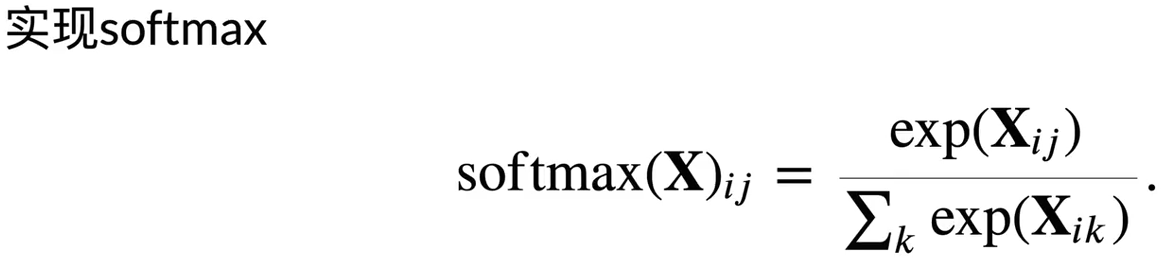

In [87]:
def softmax(X): # 对于矩阵来说就是对每一行给它做softmax
    X_exp = torch.exp(X) # 先对每个元素做指数运算
    partition = X_exp.sum(1, keepdim=True) # 维度为1即对每一行进行求和
    return X_exp / partition # 这里应用了广播机制，对第i行每个元素除以partition的第i个元素

In [89]:
# 验证:我们将每个元素变成要给非负数。此外，依据概率原理，每行总和为1
X = torch.normal(0, 1, (2, 5))# 随机创建一个均值0方差1的2行5列矩阵
print(X)
X_prob = softmax(X) # 放进softmax,首先所有变正了
X_prob, X_prob.sum(1) # 每行的总和是1，实现概率的前提

tensor([[-0.9771, -0.1000,  1.1300,  1.2173,  0.3801],
        [-0.3432,  2.3900,  0.1445,  1.7808,  0.1954]])


(tensor([[0.0408, 0.0982, 0.3358, 0.3665, 0.1587],
         [0.0356, 0.5476, 0.0580, 0.2978, 0.0610]]),
 tensor([1., 1.]))

In [90]:
# 实现softmax回归模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])), W)+ b)# -1代表自动计算，应当等于batch_siez
# W.shape[0]=784，X就会被reshape成一个256*784的矩阵,再对X和 W做矩阵乘法，通过广播再加上bias

In [92]:
# 回顾 : 创建一个数据y_hat,其中包含2个样本在3个类别的预测概率，使用y作为y_hat中概率的索引
y = torch.tensor([0, 2]) # 真实的标号
y_hat = torch.tensor([[0.1, 0.3, 0.6],[0.3, 0.2, 0.5]])
y_hat[[0, 1], y] # 对0样本，拿出y[0]对应元素，对1样本，拿出y[1]对应元素

tensor([0.1000, 0.5000])

In [94]:
# 实现交叉熵损失函数
def cross_entropy(y_hat, y):# y_hat为预测，y为真实值
    return -torch.log(y_hat[range(len(y_hat)), y]) # 如上拿出这些值，求log的负数
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [95]:
# 将预测类别与真实y元素进行比较
def accuracy(y_hat, y):
    '''计算预测正确的数量'''
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: # 如果y_hat是二维矩阵的话
        y_hat = y_hat.argmax(axis = 1)# axis=1即为按照每一行求argmax,即每一行最大元素的下标存入y_hat
    cmp = y_hat.type(y.dtype) == y # 将y_hat转成y的类型做比较，成布尔类型
    return float(cmp.type(y.dtype).sum()) #再把它转成和y一样的形状求和转成浮点数

accuracy(y_hat, y) / len(y) # 找出预测正确的样本数除y的长度

0.5

In [96]:
# 评估在任意模型net的准确率-给要给模型和数据迭代器，来计算模型在这个数据迭代器上的精度
def evaluate_accuracy(net, data_iter):
    '''计算在指定数据集上模型的精度'''
    if isinstance(net, torch.nn.Module): # 如果是nn的类型
        net.eval() # 将模型设为评估模式，不要计算梯度了，只做一个forward pass
    metric = Accumulator(2) # 正确预测数、预测总数
    for X, y in data_iter: # 每次拿到要给batch的X和y
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1] # 分类正确的样本数和总样本数，就是精度

In [98]:
# Accumulator实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量
class Accumulator:
    '''在n个变量上累加'''
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]
evaluate_accuracy(net, test_iter) # 这里是随机出来的模型和测试迭代器的测试精度

0.0672

In [110]:
# Softmax回归的训练脚本
def train_epoch_ch3(net, train_iter, loss, updater):
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y),
                       y.size().numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [116]:
# 辅助动画:定义一个在动画中绘制数据的实用程序类,实时看到训练过程的变化
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(5.5, 4.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [122]:
# 本章训练函数
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)#训练
#         print("train_loss & train_acc :",train_metrics)
        test_acc = evaluate_accuracy(net, test_iter)#测试
#         print('test_acc:',test_acc)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [118]:
# 小批量随机梯度下降来优化模型的损失函数
lr = 0.1
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size) # SGD优化

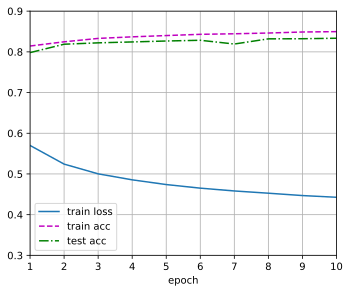

In [123]:
#训练模型10个迭代周期
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

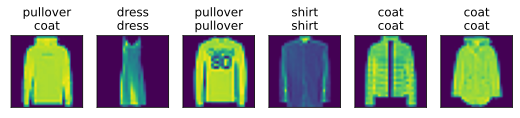

In [124]:
def predict_ch3(net, test_iter, n=6):
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(d2l.argmax(net(X), axis=1))# 拿到标号
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        d2l.reshape(X[0:n], (n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

##### softmax的torch简洁实现

通过深度学习框架的高级API能够实现softmax回归变得更加容易

In [126]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = load_data_fashionMnist(batch_size)

In [127]:
# softmax回归的输出层是一个全连接层
# pytorch不会隐式的调整输入的形状
# 因此我们定义了展平层(flatten)在线性层前调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))# flatten把任何维度的tensor展成2d的tensor

def init_weights(m):#对每一层初始化参数
    if type(m) == nn.Linear:# 如果是linear layer的话
        nn.init.normal_(m.weight, std=0.01)# weight初始值默认为0，方差为1
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [128]:
# 损失和优化
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

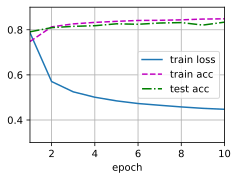

In [129]:
# 调用之前定义的训练函数来训练模型
num_epochs = 10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

#### 感知机

单个感知机是二分类模型，求解算法等价于batch_size为1的梯度下降，但是只是线性分割面，所以不能拟合XOR函数，这也导致了AI第一次寒冬，后来发现解决办法就是多层感知机MLP
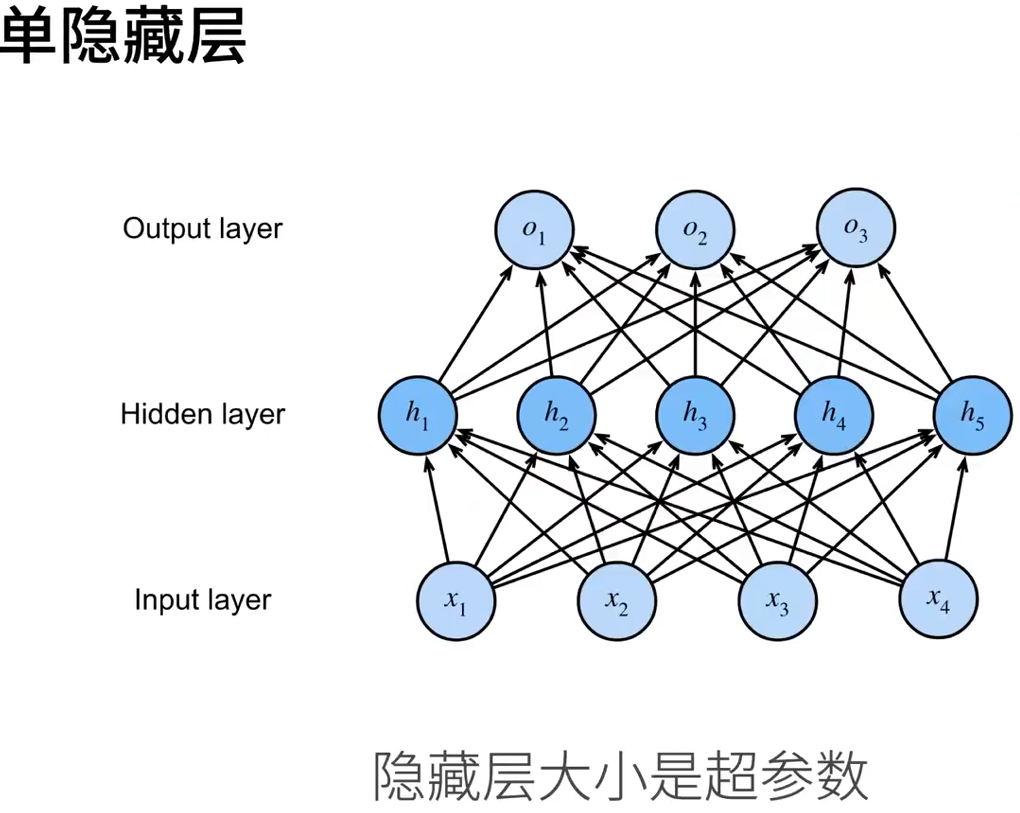
一定要加激活函数，要不然即使多层了仍然是最简单的线性模型，加了激活函数才有强大的非线性拟合能力

激活函数：

    sigmoid:1/[1+exp(-x)] - 就是一个软的 1 if x>0 | 0 others
    tanh:[1-exp(-2x)/[1+exp(-2x) - 将sigmoid输入投影到-1,1
    RELU:Rectified linear unit - max(x,0) - 不用求exp，速度很快，算一次exp都是很贵的，一次exp等价一百次乘法运算的成本，GPU稍微好一点，但是还是没有max算起来快
    
多类分类:
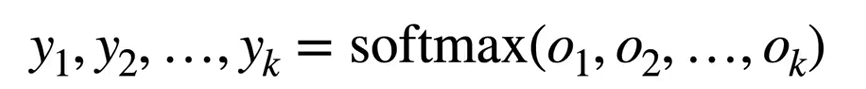
MLP就是比softmax回归多了一层的隐藏层，如果去掉隐藏层，MLP就变成softmax，加上隐藏层，softmax就变成MLP。MLP的超参是隐藏层的层数和每层的神经元个数，一般都是可以做一个从胖到窄的，慢慢压缩信息，机器学习本质就是做压缩，但是一次缩的太快会损失很多信息，要慢慢缩最好

##### MLP的从零开始实现

In [130]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = load_data_fashionMnist(batch_size)

In [143]:
# 实现一个具有单隐藏层的多层感知机，它包含256个隐藏单元
num_inputs, num_outputs, num_hiddens = 784, 10, 256
# MLP
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]# 两层，一层hidden一层output

In [134]:
# 实现激活函数
def relu(X):
    a = torch.zeros_like(X)# 数据类型和形状都一样但是值是0的矩阵
    return torch.max(X, a)

In [137]:
# 实现MLP模型
def net(X):
    X = X.reshape((-1, num_inputs))# -1这里会变成batch_size，numinputs=784即为拉成一个矩阵
    H = relu(X @ W1 + b1) # @为矩阵乘法
    return (H @ W2 + b2)
loss = nn.CrossEntropyLoss()

AssertionError: 0.6907015942573548

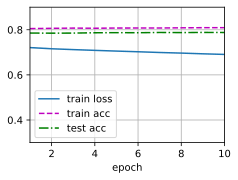

In [139]:
# 训练
num_epochs=10
lr = 0.01
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

##### MLP的torch简洁实现

In [140]:
import torch
from torch import nn
from d2l import torch as d2l

In [141]:
# 隐藏层包含256个隐藏单元，并使用了ReLu
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256),nn.ReLU(),
                    nn.Linear(256,10))# flatten把任何维度的tensor展成2d的tensor

def init_weights(m):#对每一层初始化参数
    if type(m) == nn.Linear:# 如果是linear layer的话
        nn.init.normal_(m.weight, std=0.01)# weight初始值默认为0，方差为1
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

AssertionError: 2.3036517552693683

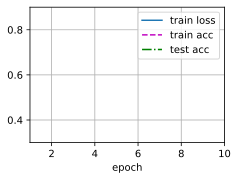

In [144]:
# 训练过程
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(),lr = lr)

train_iter, test_iter = load_data_fashionMnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

#### 过拟合和欠拟合实验

通过多项式拟合来交互地探索这些概念

In [11]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

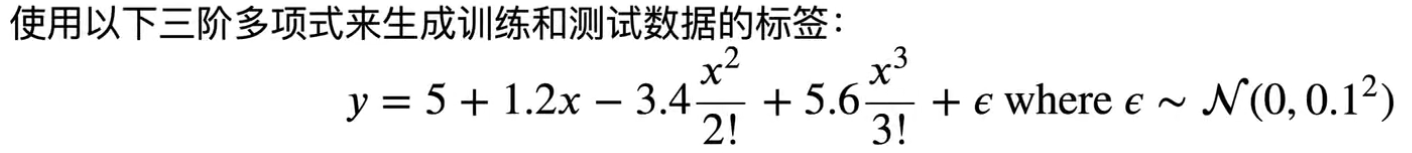

In [12]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i+1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [13]:
# 看一下前两个样本
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [
    torch.tensor(x, dtype=torch.float32) for x in [true_w, features, poly_features, labels]]
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.8814],
         [-0.1502]]),
 tensor([[ 1.0000e+00, -8.8135e-01,  3.8839e-01, -1.1410e-01,  2.5141e-02,
          -4.4317e-03,  6.5098e-04, -8.1963e-05,  9.0298e-06, -8.8428e-07,
           7.7936e-08, -6.2445e-09,  4.5863e-10, -3.1094e-11,  1.9575e-12,
          -1.1501e-13,  6.3355e-15, -3.2846e-16,  1.6083e-17, -7.4603e-19],
         [ 1.0000e+00, -1.5018e-01,  1.1277e-02, -5.6453e-04,  2.1195e-05,
          -6.3663e-07,  1.5935e-08, -3.4187e-10,  6.4178e-12, -1.0709e-13,
           1.6083e-15, -2.1958e-17,  2.7480e-19, -3.1746e-21,  3.4055e-23,
          -3.4096e-25,  3.2003e-27, -2.8272e-29,  2.3588e-31, -1.8645e-33]]),
 tensor([2.0365, 4.7027]))

In [14]:
# 实现一个函数来评估模型在给定数据集上的损失
def evaluate_loss(net, data_iter, loss):  
    """评估给定数据集上模型的损失。"""
    metric = d2l.Accumulator(2)  # 损失的总和, 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [15]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss()
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1, 1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1, 1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
#     print('weight:', net[0].weight.data.numpy())

三阶多项式函数拟合(正态)

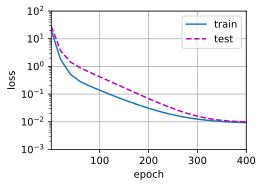

In [16]:
# 从多项式特征中选择前4个维度，即 1, x, x^2/2!, x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

线性函数拟合(欠拟合)

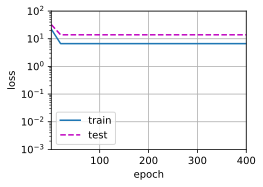

In [17]:
# 从多项式特征中选择前2个维度，即 1, x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

高阶多项式函数拟合(过拟合)

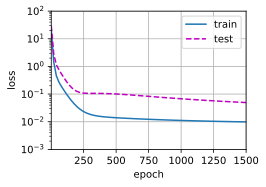

In [18]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

In [19]:
#TODO : weight_decay